<a href="https://colab.research.google.com/github/dhruv21csu155/AIML/blob/main/Clustering_Algos_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [165]:
X,y = make_blobs(n_samples=1000, centers=3,n_features=2,random_state=23)

In [166]:
X.shape

(1000, 2)

In [167]:
y.shape

(1000,)

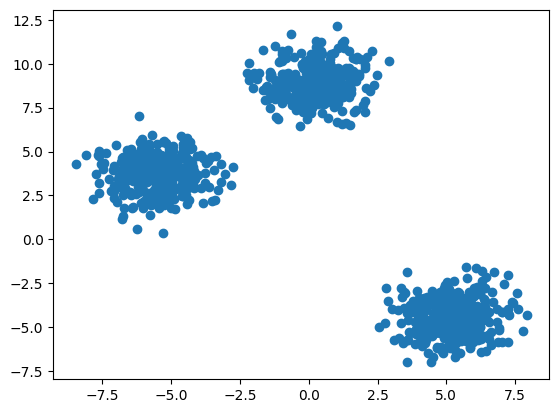

In [168]:
plt.scatter(X[:,0],X[:,1])

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size =0.33,random_state = 42)

In [170]:
from sklearn.cluster import KMeans

In [171]:
## Manual Process
## Elbow Method to select the k value

wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init = 'k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [172]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1140.4677884655134,
 992.0708509383511,
 853.3367634782235,
 756.6888745922538,
 665.5219043717934,
 579.1644782786625,
 536.1300018414763]

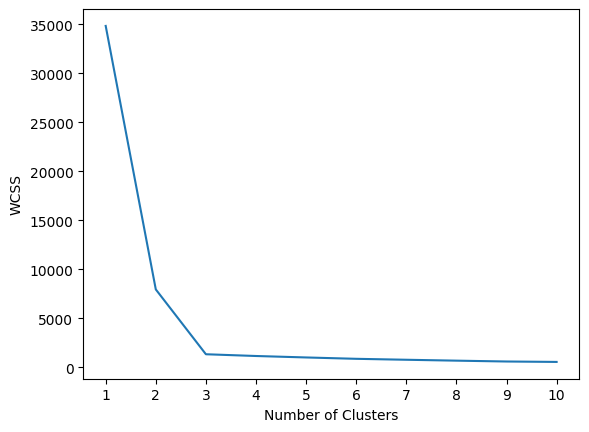

In [173]:
##plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [174]:
kmeans = KMeans(n_clusters=3, init = 'k-means++')

In [175]:
y_labels = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


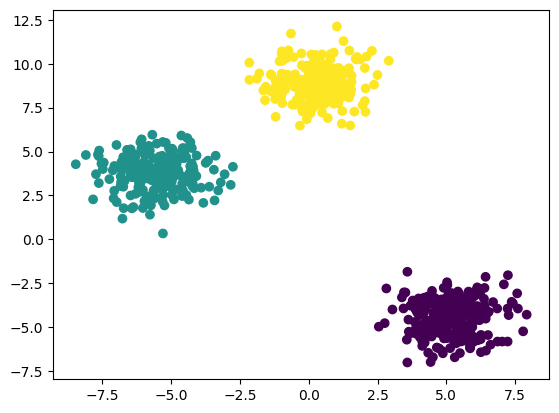

In [176]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_labels)

In [177]:
y_test_labels = kmeans.predict(X_test)

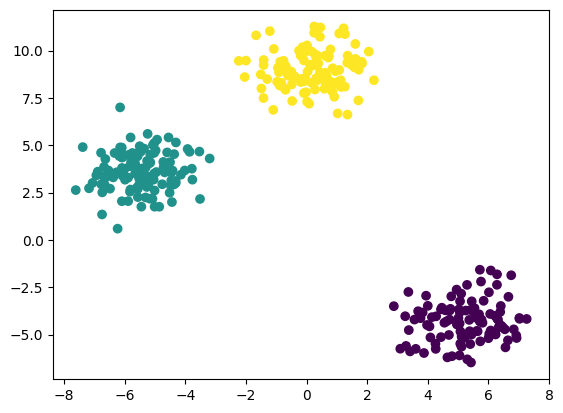

In [178]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test_labels)

**Automating the above process of finding no. of clusters usinh KNEE - Locator**

In [179]:
## knee-locator
!pip install kneed

In [180]:
from kneed import KneeLocator

In [181]:
kl = KneeLocator(range(1,11), wcss, curve ='convex', direction = 'decreasing')
# NOTE : if wcss value decresing the "convex" and "Decresing" else "concave" and "Increasing"
kl.elbow

3

**Performance Metrics** -
**Silhoutte Score**

In [182]:
from sklearn.metrics import silhouette_score

In [183]:
silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [184]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49134355005793395,
 0.3205200987542423,
 0.3442959350461067,
 0.3454149614800336,
 0.34618966956722247,
 0.345640921532432]

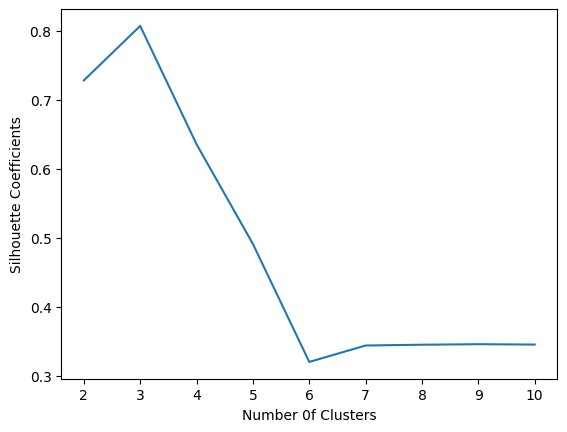

In [185]:
## plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number 0f Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

**HIERARCHIAL CLUSTERING**

In [186]:
from sklearn import datasets

In [187]:
iris = datasets.load_iris()

In [188]:
iris_data = pd.DataFrame(iris.data)

In [189]:
iris_data.head(2)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [190]:
iris_data.columns = iris.feature_names

In [191]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [192]:
## Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [193]:
X_scaled = scaler.fit_transform(iris_data)

In [194]:
X_scaled.shape

(150, 4)

In [195]:
## Apply PCA to reduce dimensions(4 features to 2 featue(4D to 2D))
from sklearn.decomposition import PCA

In [196]:
pca = PCA(n_components = 2)


In [197]:
pca

PCA(n_components=2)

In [198]:
pca_scaled = pca.fit_transform(X_scaled)

In [199]:
pca_scaled.shape

(150, 2)

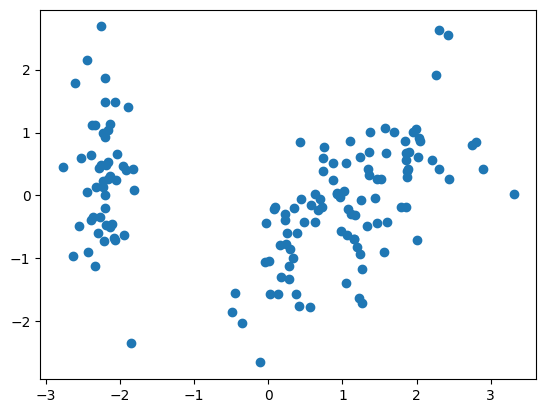

In [200]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

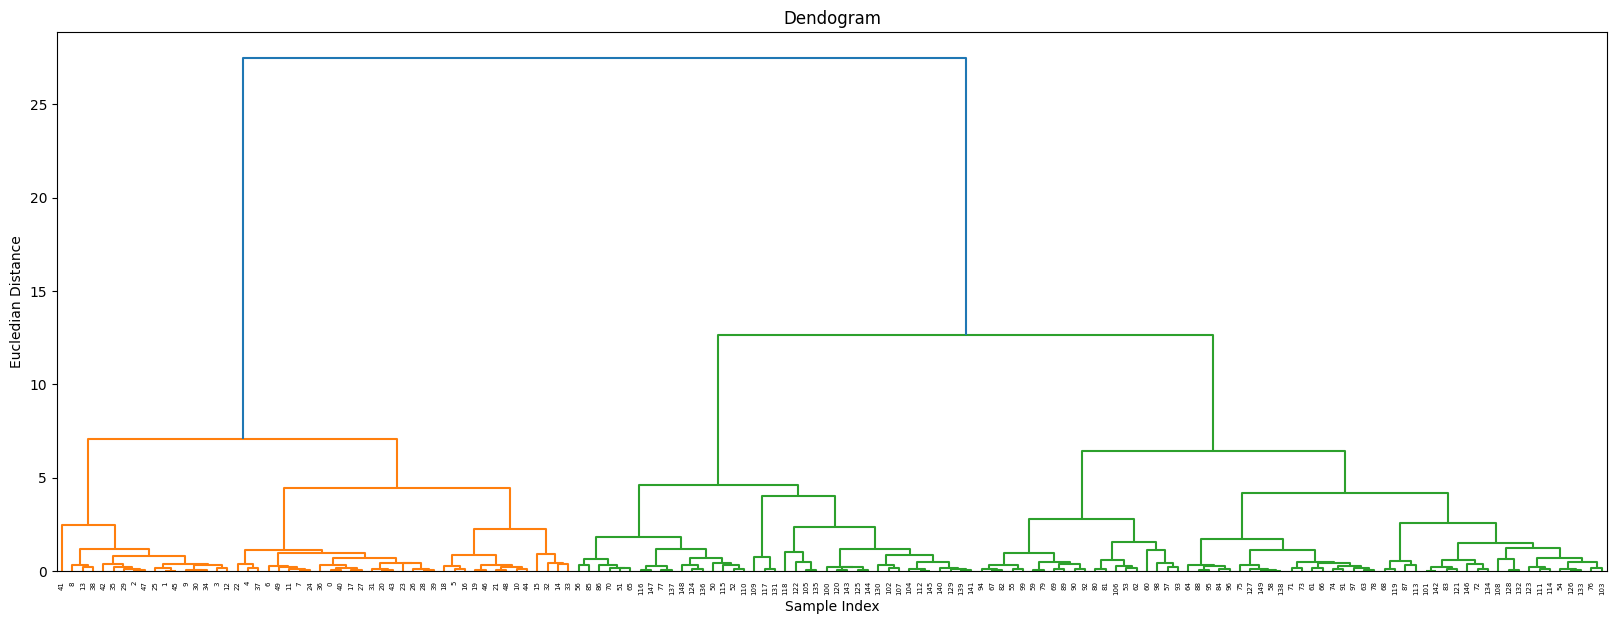

In [201]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [202]:
from sklearn.cluster import AgglomerativeClustering

In [203]:
silhouette_coefficients = []
for k in range(2,11):
  agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
  agglo.fit(X_scaled)
  score = silhouette_score(X_scaled, agglo.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

In [204]:
silhouette_coefficients


[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

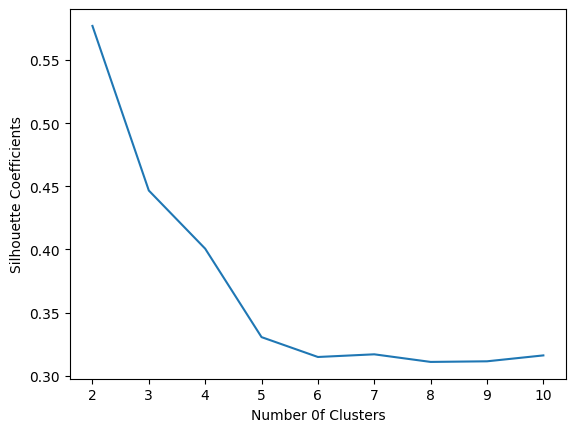

In [205]:
## plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number 0f Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

In [206]:
cluster = AgglomerativeClustering(n_clusters=2,affinity ='euclidean',linkage='ward')
cluster.fit(pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [210]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

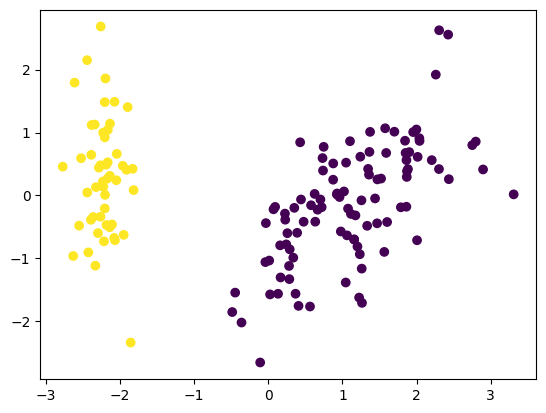

In [211]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1],c = cluster.labels_)